럭키백 안에 들어가 있을 생선 종류의 확률을 구해보자.  
럭키백 안에 들어갈 수 있는 생선은 7개이며 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을때 7개 생선에 대한 확률을 출력해야 한다.  
이번에는 길이, 높이, 두께 외에도 대각선 길이와 무게도 사용한다.

회귀 문제일까? 분류 문제일까?  
먼저, **k-최근접 이웃**을 이용하여 주변 이웃의 클래스 비율을 확률이라고 출력해보자.  
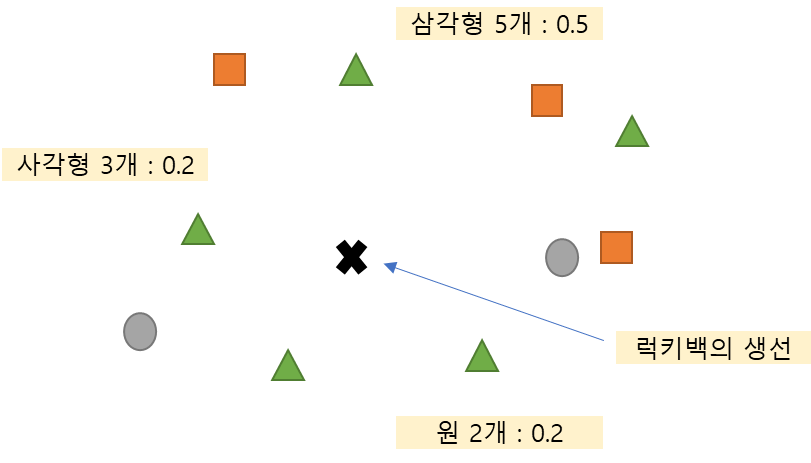  

  
사이킷런의 k-최근접 이웃 분류기도 이와 동일한 방식으로 클래스 확률을 계산하여 제공한다.  
데이터를 준비하고 k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률을 계산해보자

### 데이터 준비하기  
판다스의 read_csv() 함수로 CSV 파일을 데이터프레임으로 변환한 다음 head() 메서드로 처음 5개 행을 출력해보자.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


맨 왼쪽의 0,1,2 와 같은 숫자는 행 번호(판다스의 인덱스)이다. 맨 위에 쓰여진 species, weight, length, diagonal, height, width는 열 제목이다.  
판다스는 CSV 파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어준다.

#### 데이터프레임?  
데이터프레임은 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다. 데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있다. 데이터프레임은 통계와 그래프를 위한 메서드를 풍부하게 제공한다.

어떤 종류의 생선이 있는지 Species 열에서 고유한 값을 추출해 보자. 판다스의 unique() 함수를 사용한다.

In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용한다.  
데이터프레임에서 열을 선택하는 방법은 데이터프레임에서 원하는 열을 리스트로 나열하면 된다.  
Species 열을 빼고 나머지 5개 열을 선택해 보자.

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환된다.  
이를 to_numpy() 메서드로 넘파이 배열로 바꾸어 fish_input에 저장했다. fish_input에 5개의 특성이 잘 저장되었는지 처음 5개 행을 출력해보자.

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


동일한 방법으로 타깃 데이터를 생성한다.

Species 열을 선택할 때 fish[['Species']]와 같이 괄호를 두개 사용하지 않도록 주의해야한다. 이렇게 하면 fish_target이 2차원 배열이 된다.

In [5]:
fish_target = fish['Species'].to_numpy()

데이터를 훈련 세트와 테스트 세트로 나눈다.

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

그 다음 사이킷런의 StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리 해야한다. 이때 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다는 점을 잊지 말아야한다.

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

필요한 데이터가 준비되었다. k-최근접 이웃 분류기로 테스트 세트에 들어 있는 확률을 예측해 보자.

###  k-최근접 이웃 분류기의 확률 예측  
2장에서 했던 것처럼 사이킷런의 KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인해 보자. 최근접 이웃 개수인 k를 3으로 지정하여 사용한다.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다. 이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류(multi-class classification)**라고 부른다.  
  
하지만 앞선 코드에서 봤듯이 2장에서 만들었던 이진 분류와 모델을 만들고 훈련하는 방식은 동일하다.  
이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 데이터를 만들었다.  
  
다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용이 가능하다.  
  
이때 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순서로 매겨진다. 따라서 pd.unique(fish['Species'])로 출력했던 순서와 달라진다.  
KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있다.

In [9]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


'Bream'이 첫 번째 클래스, 'Parkki'가 두 번째 클래스가 된다.  
predict() 메서드는 타깃값으로 예측을 출력한다. 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해 보자.

In [10]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환한다. 테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해 보자. 넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림을 하는데, decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.

In [11]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba() 메서드의 출력 순서는 앞서 보았던 classes_ 속성과 같다. 첫 번째 열이 'Bream'에 대한 확률, 두 번째 열이 'Parkki'에 대한 확률이다.  
이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해 보자. 네 번째 샘플의 최근접 이웃 클래스를 확인해 보자.

kneighbors() 메서드의 입력은 2차원 배열이어야 한다. 이를 위해 넘파이 배열의 슬라이싱 연산자를 사용했다. 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다. 여기에서는 네 번째 샘플 하나를 선택했다.

In [12]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개이고 세 번째 클래스인 'Perch'가 2개이다. 따라서 다섯 번째 클래스에 대한 확률은 1/3 = 0.3333이고 세 번째 클래스에 대한 확률은 2/3 = 0.6667이 된다. 앞서 출력한 네 번째 클래스 확률과 같다.

### 로지스틱 회귀(logistic regression)  
로지스틱 회귀는 이름은 회귀이지만 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다. 예를 들면 다음과 같다.  
$z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f$  
  
여기에서 a, b, c, d, e는 가중치 혹은 계수이다. 특성은 늘어났지만 다중 회귀를 위한 선형 방정식과 같다. z는 어떤 값도 가능하다. 하지만 확률이 되려면 0~1(또는 0~100%) 사이 값이 되어야 한다. z가 아주 큰 음수일 때 0이 되고, 아주 큰 양수일 때 1이 되도록 바꾸는 방법은 무엇일까?  
**시그모이드 함수(sigmoid function)(또는 로지스틱 함수)**를 사용하면 가능하다.  
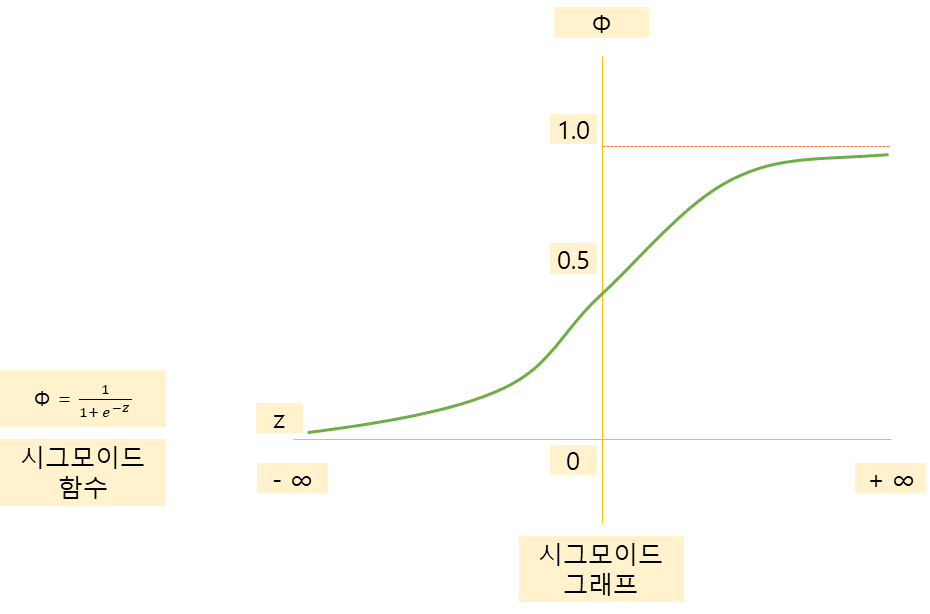  

왼쪽의 식이 시그모이드 함수이다. 선형 방정식의 출력 z의 음수를 사용해 자연 상수 $e$를 거듭제곱하고 1을 더한 값의 역수를 취한다. 이 함수는 오른쪽과 같은 그래프를 만들 수 있다.  
z가 무한하게 큰 음수일 경우 0에 가까워지고 z가 무한하게 큰 양수일 경우 1에 가까워진다. z가 0일 때는 0.5가 된다. z가 어떤 값이 되더라도 Φ는 0 ~ 1 사이를 벗어날 수 없다.  
그렇다면 0 ~ 1 사이 값을 0~100% 확률로 해석이 가능하다.  
  
  
넘파이를 사용하면 그래프를 간단히 그릴 수 있다. -5와 5 사이에 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그모이드 함수를 계산하자. 이때 지수 함수 계산은 np.exp() 함수를 사용한다.

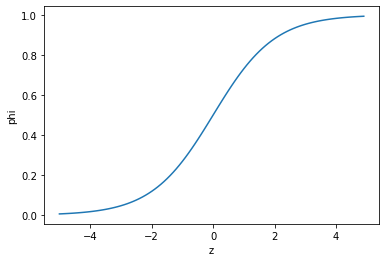

In [13]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력이 0에서 1까지 변하는 것을 활용하여 로지스틱 회귀 모델을 훈련해 보자.  
사이킷런에는 로지스틱 회귀 모델인 LogisticRegression 클래스가 있다.  
훈련하기 전에 간단한 이진 분류를 수행해보자. 이진 분류일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단한다.(사이킷런은 딱 0.5일때 음성 클래스로 판단한다.)  
먼저 도미와 빙어 2개를 사용해서 이진 분류를 수행해 보자.

#### 로지스틱 회귀로 이진 분류 수행하기  
넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 **불리언 인덱싱(boolean indexing)**이라 한다. 예를 들어보자. 다음과 같이 'A'에서 'E'까지 5개의 원소로 이루어진 배열이 있다. 여기서 'A'와 'C'만 골라내려면 첫 번째와 세 번째 원소만  True이고 나머지 원소는 모두 False인 배열을 전달하면 된다.

In [14]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


이 방식을 사용하여 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내보자. 비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있다.  
예를 들어 도미인 행을 골라내려면 train_target == 'Bream'과 같이 쓴다. 이 비교식은 train_target 배열에서 'Bream'인 것은 True이고 그 외는 모두 False인 배열을 반환한다.  
도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치며 도미와 빙어에 대한 행만 골라낼 수 있다.

In [15]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [16]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
print(train_bream_smelt) # bream과 smelt에 해당하는 train_scaled 값만 선택되어 입력되었다.
target_bream_smelt = train_target[bream_smelt_indexes]
print(target_bream_smelt) # bream과 smelt에 해당하는 train_target 값만 선택되어 입력되었다.

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그외는 모두 False 값이 들어가 있다. 따라서 이 배열을 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.

이제 이 데이터로 로지스틱 회귀 모델을 훈련해 보자. LogisticRegression 클래스는 선형 모델이므로 sklearn_linear_model 패키지 아래에 있다.

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)


LogisticRegression()

훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측해 보자.

In [18]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두 번째 샘플을 제외하고 모두 도미로 예측했다. KNeighborsClassifier와 마찬가지로 예측 확률은 predict_proba() 메서드에서 제공한다. train_bream_smelt에서 처음 5개 샘플의 에측 확률을 출력해 보자.

In [19]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


샘플마다 2개의 확률이 출력되었다. 첫 번째 열이 음성 클래스(0)에 대한 확률이고 두 번째 열이 양성 클래스(1)에 대한 확률이다. 그럼 bream과 smelt 중에 어떤 것이 양성 클래스일까? 앞서 k-최근접 이웃 분류기에서 보았듯이 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용한다. classes_ 속성에서 확인해 보자.

In [20]:
print(lr.classes_)

['Bream' 'Smelt']


빙어(smelt)가 양성 클래스다. predict_proba() 메서드가 반환한 배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높다. 나머지는 모두 도미(Bream)으로 예측한다.

만약 도미(Bream)을 양성 클래스로 사용하려면 2장에서 했던 것 처럼 Bream인 타겟값을 1로 만들고 나머지 타겟값은 0으로 만들어 사용하면 된다.

로지스틱 회귀로 이진 분류가 수행되었다. 선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인해 보자.

In [21]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


따라서 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.
$z = -0.404 * (Weight) -0.576 * (Length) - 0.663 * (Diagonal) -1.013 * (Height) -0.732 * (Width) -2.161$
#### 이때 각 Weight, Length 등의 값들은 표준화된 값이다.

로지스틱 회귀는 선형 회귀와 비슷하다. LogisticRegression 모델로 z 값을 계산해 볼 수 있을까? LogisticRegression 클래스는 decision_function() 메서드로 z 값을 출력할 수 있다. train_bream_smelt의 처음 5개 샘플의 z 값을 출력해 보자.

In [22]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다. 다행히 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. expit()이다. np.exp() 함수를 사용해 분수 계산을 하는 것 보다 훨씬 편리하고 안전하다. decisions 배열의 값을 확률로 변환해 보자.

In [23]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다. 즉 decision_function() 메서드는 양성 클래스에 대한 z 값을 반환한다.

이진 분류를 위해 2개의 생선 샘플을 골라냈고 이를 사용해 로지스틱 회귀 모델을 훈련했다. 이진 분류일 경우 predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다.  
또 decision_function() 메서드는 양성 클래스에 대한 z 값을 계산한다.  
또 coef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어 있다.  
  
#### 이제 이진 분류의 경험을 바탕으로 7개의 생선을 분류하는 다중 분류 문제로 넘어가 보자.

### 로지스틱 회귀로 다중 분류 수행하기  
이진 분류를 위해 로지스틱 회귀 모델을 훈련시켜 보았다. 다중 분류도 크게 다르지 않으며 LogisticRegression 클래스를 사용해 7개의 생선을 분류해 보면서 이진 분류와의 차이점을 알아보겠다.  
  
  
LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다. max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100이다. 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고가 발생하므로 반복 횟수를 1,000으로 늘린다.  
  
  
또한 LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다. 이런 규제를 L2 규제라고 한다. 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했다. alpha가 커지면 규제가 커지며 LogisticRegression에서 규제를 제어하는 매개변수는 C이다. 하지만 C는 alpha와 반대로 작을수록 규제가 커진다. C의 기본값은 1이며 규제를 조금 완화하기 위해 20으로 늘려 설정한다.  
  
  
다음은 LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드이다. 7개의 생선 데이터가 모두 들어있는 train_scaled와 train_target을 사용한 점을 주목하자.

In [24]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


점수는 양호하다. 과대/과소 적합 중 어느 쪽으로 치우치지 않은 것으로 보인다. 테스트 세트의 처음 5개 샘플에 대한 예측을 출력 해보자.

In [25]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


이번에는 테스트 세트 처음 5개 샘플에 대한 에측 확률을 출력해 보자. 소수점 네 번재 자리에서 반올림한다.

In [26]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


이진 분류에서는 열이 2개만 있었지만 7개 생선에 대한 확률을 계산했으므로 7개의 열이 출력되었다. 각 열 순서마다 어떤 생선에 대한 확률이 출력되었는지 classes_ 속성에서 클래스 정보를 확인해 보자.

In [27]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


다중 분류의 경우 선형 방정식은 어떤 모습인지 coef_와 intercept_의 크기를 출력해 보자.

In [28]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 5개의 특성을 사용하므로 coef_ 배열의 열은 5개이다. 행이 7개이고 열이 7개인데, 이 의미는 이진 분류에서 보았던 z를 7개나 계산했다는 의미이다. 다중 분류는 클래스마다 z값을 하나씩 계산한다. 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다.  
확률은 어떻게 계산된 것일까? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환하였다. 다중 분류는 이와 달리 **소프트맥스(softmax)**함수를 사용하여 7개의 z 값을 확률로 변환한다.

#### 소프트맥스 함수  
시그모이드 함수는 하나의 선형 방정식의 출력값을 0 ~ 1 사이로 압축한다. 이와 달리 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 만든다. 이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 한다.

소프트맥수 함수의 계산방식은 아래와 같다.  
먼저 7개의 z 값의 이름을 $z1$에서 $z7$이라고 붙인다. $z1 ~ z7$까지 값을 사용해 지수 함수 $e^{z1}$ ~ $e^{z7}$을 계산해 모두 더한다. 이를 $e$_ $sum$이라고 부르자.  
$e$_ $sum$ = $e^{z1}$ + $e^{z2}$ + $e^{z3}$ + $e^{z4}$ + $e^{z5}$ + $e^{z6}$ + $e^{z7}$  
그 다음 $e^{z1}$ ~ $e^{z7}$을 각각 $e$_ $sum$으로 나누어 준다.

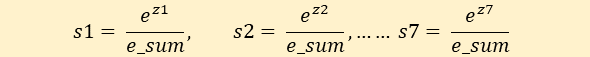  

*s1*에서 *s7*까지 모두 더하면 분자와 분모가 같아지므로 1이 되고 7개 생선에 대한 확률의 합은 1이 되어야 하므로 잘 맞는다.  

---

시그모이드 함수와 소프트맥스 함수는 나중에 신경망을 배울 때 다시 사용된다.

이진 분류에서처럼 decision_function() 메서드로 $z1 ~ z7$ 까지 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꿔보자. 먼저 테스트 세트의 샘플 5개에 대한 $z1 ~ z7$ 의 값을 구해보자.

In [29]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


사이파이는 소프트맥스 함수를 제공한다. scipy.special 아래의 softmax() 함수를 임포트해 사용하자.

In [30]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 decision 배열을 softmax() 함수에 전달했다. softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정한다. axis = 1로 지정하여 각 행(열 수가 증가하는 방향), 즉 각 샘플에 대해 소프트맥스를 계산하였다. 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.  
  
  
출력 결과를 앞서 구한 proba 배열과 비교해보면 결과가 일치한다.  
로지스틱 회귀를 이용하여 7개의 생선에 대한 확률을 예측하는 모델을 훈련하였다.  
k-최근접 이웃 모델이 확률을 출력할 수 있지만 이웃한 샘플의 클래스 비율이기 때문에 항상 정해진 확률만을 출력한다. 좀 더 완성도 높은 모델을 위해 대표적인 분류 알고리즘인 로지스틱 회귀를 사용했다. 로지스틱 회귀는 회귀 모델이 아닌 분류 모델이고 선형 회귀처럼 선형 방정식을 사용한다.  
하지만 선형 회귀처럼 계산한 값을 그대로 출력하지 않고 로지스틱 회귀는 이 값을 0 ~ 1사이로 압축한다. 이 값을 마치 0 ~ 100% 사이의 확률로 이해할 수 있다.  
로지스틱 회귀는 이진 분류에서는 하나의 선형 방정식을 훈련한다. 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만든다. 이 값이 양성 클래스에 대한 확률이다. 음성 클래스의 확률은 1에서 양성 클래스의 확률을 빼면 된다.  

다중 분류일 경우에는 클래스 개수만큼 방정식을 훈련한다. 그 다음 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만든다. 이 값을 각 클래스에 대한 확률로 이해할 수 있다.

**로지스틱 회귀**
- 선형 방정식을 사용한 분류 알고리즘. 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있다.  
  
**다중 분류**
- 타깃 클래스가 2개 이상인 분류 문제이다. 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측한다.  
  
**시그모이드 함수**
- 선형 방정식의 출력을 0과 1 사이의 값으로 압축하며 이진 분류를 위해 사용한다.  
  
**소프트맥스 함수**
- 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만든다.

### scikit-learn  
+ LogisticRegression은 선형 분류 알고리즘은 로지스틱 회귀를 위한 클래스이다.  
solver 매개변수에서 사용할 알고리즘을 선택할 수 있다. 기본값은 'lbfgs'이다. 사이킷런 0.17버전에 추가된 'sag'는 확률적 평균 경사 하강법 알고리즘으로 특성과 샘플 수가 많을때 성능이 빠르고 좋다. 이후  0.19버전에는 개선 버전인 'saga'가 추가되었다.  
penalty 매개변수에서 L2 규제(릿지 방식)와 L1 규제(라쏘 방식)을 선택할 수 있다. 기본값은 L2 규제를 의미하는 'l2'이다.  
C 매개변수에서 규제의 강도를 제어한다. 기본값은 1.0이며 값이 작을수록 규제가 강해진다.  
+ predict_proba() 메서드는 예측 확률을 반환한다.  
이진 분류의 경우에는 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환한다.  
다중 분류의 경우에는 샘플마다 모든 클래스에 대한 확률을 반환한다.  
+ decision_function()은 모델이 학습한 선형 방정식의 출력을 반환한다.  
이진 분류의 경우 양성 클래스의 확률이 반환된다. 이 값이 0보다 크며 양성 클래스, 작거나 같으면 음성 클래스로 예측한다.  
다중 분류의 경우 각 클래스마다 선형 방정식을 계산한다. 가장 큰 값의 클래스가 예측 클래스가 된다.